In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Test 

In [70]:
#export
from exp.nb_00 import *
import operator

def test(a, b, cmp, cname=None):
    if cname is None: cname=cmp.__name__
    assert cmp(a, b), f"{canme}:\n{a}\n{b}"
    
def test_eq(a, b): test(a, b, operator.eq, "==")

In [71]:
test_eq(TEST, 'test')

## Get data 

In [4]:
#export
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL="http://deeplearning.net/data/mnist/mnist.pkl"

In [5]:
path = Path("./data/mnist/mnist.pkl.gz")

In [6]:
with gzip.open(path, "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [7]:
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train, x_train.shape, y_train, y_train.shape, y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

In [8]:
assert n==y_train.shape[0]==50000
test_eq(c, 28*28)
test_eq(y_train.min(), 0)
test_eq(y_train.max(), 9)

In [9]:
mpl.rcParams["image.cmap"] = "gray"

In [10]:
img = x_train[0]

In [11]:
img.view(28, 28).type()

'torch.FloatTensor'

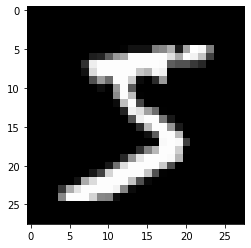

In [12]:
plt.imshow(img.view(28,28));

In [13]:
weights = torch.randn(784, 10)
bias = torch.zeros(10)
weights.shape, bias.shape

(torch.Size([784, 10]), torch.Size([10]))

## Matrix multiplication 

In [14]:
def matmul(a, b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac == br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i,j] += a[i,k]*b[k,j]
    return c

In [15]:
m1 = x_valid[:5]
m2 = weights
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [16]:
%time t1=matmul(m1, m2)

CPU times: user 420 ms, sys: 13 µs, total: 420 ms
Wall time: 420 ms


In [17]:
t1.shape

torch.Size([5, 10])

In [18]:
len(x_train)

50000

In [19]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])
a, b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [20]:
a + b

tensor([12., 14.,  3.])

In [21]:
(a < b).float().mean()

tensor(0.6667)

In [22]:
m = tensor([[1., 2, 3], [4, 5, 6], [7, 8, 9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [23]:
# frobenius norm

In [24]:
(m*m).sum().sqrt()

tensor(16.8819)

## Elementwise matmul 

In [25]:
def matmul(a, b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac == br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] = (a[i,:] * b[:,j]).sum()
    return c

In [26]:
%timeit -n 10 _=matmul(m1, m2)

616 µs ± 10.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
#export
def near(a, b): return torch.allclose(a, b, rtol=1e-3, atol=1e-5)
def test_near(a, b): test(a, b, near)

In [28]:
test_near(t1, matmul(m1, m2))

## Broadcasting with a scalar 

In [29]:
a

tensor([10.,  6., -4.])

In [30]:
a > 0

tensor([ True,  True, False])

In [31]:
a + 1

tensor([11.,  7., -3.])

In [32]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [33]:
c = tensor([10., 20, 30]); c

tensor([10., 20., 30.])

In [34]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [35]:
m.shape, c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [36]:
m + c

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [37]:
c + m

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [38]:
t = c.expand_as(m)

In [39]:
t.storage(), t.shape, t.stride()

( 10.0
  20.0
  30.0
 [torch.FloatStorage of size 3], torch.Size([3, 3]), (0, 1))

In [40]:
c.unsqueeze(0)

tensor([[10., 20., 30.]])

In [41]:
c.unsqueeze(1)

tensor([[10.],
        [20.],
        [30.]])

In [42]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [43]:
c.shape, c.unsqueeze(0).shape, c.unsqueeze(1).shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

In [44]:
c.shape, c[None].shape, c[:,None].shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

In [45]:
c[None].shape, c[...,None].shape

(torch.Size([1, 3]), torch.Size([3, 1]))

In [46]:
c[:,None].expand_as(m)

tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])

In [47]:
m + c[:,None]

tensor([[11., 12., 13.],
        [24., 25., 26.],
        [37., 38., 39.]])

In [48]:
c

tensor([10., 20., 30.])

In [49]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [50]:
c[:,None]

tensor([[10.],
        [20.],
        [30.]])

## Matmul with broadcasting 

In [51]:
c, c.unsqueeze(-1)

(tensor([10., 20., 30.]), tensor([[10.],
         [20.],
         [30.]]))

In [52]:
def matmul(a, b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac == br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        c[i] = (a[i].unsqueeze(-1) * b).sum(dim=0)
    return c

In [53]:
%timeit -n 10 _=matmul(m1, m2)

140 µs ± 4.23 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [54]:
test_near(t1, matmul(m1, m2))

## Broadcasting Rules 

In [55]:
c[None, :]

tensor([[10., 20., 30.]])

In [56]:
c[None,:].shape

torch.Size([1, 3])

In [57]:
c[:,None]

tensor([[10.],
        [20.],
        [30.]])

In [58]:
c[:,None].shape

torch.Size([3, 1])

In [59]:
c[None,:] * c[:,None] # broadcast in both objects

tensor([[100., 200., 300.],
        [200., 400., 600.],
        [300., 600., 900.]])

In [60]:
c[None] > c[:,None]

tensor([[False,  True,  True],
        [False, False,  True],
        [False, False, False]])

# Einstein summation 

In [61]:
def matmul(a, b): return torch.einsum('ik, kj->ij', a, b)

In [62]:
%timeit -n 10 _=matmul(m1, m2)

23.6 µs ± 8.51 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [63]:
test_near(t1, matmul(m1, m2))

# pytorch op

In [64]:
%timeit -n 10 t2 = m1.matmul(m2)

The slowest run took 4.56 times longer than the fastest. This could mean that an intermediate result is being cached.
5.57 µs ± 4.28 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [65]:
t2 = m1 @ m2

In [66]:
%timeit -n 10 t2 = m1@m2

4.97 µs ± 2.22 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [67]:
test_near(t1, t2)

In [68]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

# Export 

In [72]:
!python notebook2script.py 01_matmul.ipynb

Converted 01_matmul.ipynb to exp/nb_01.py
